Neste exercício, vamos seguir usando o dataset MNIST, assim como nas aulas:

O __objetivo__ aqui será construir um algoritmo que faça a __predição se um dígito é par ou ímpar.__

Para isso, faça um tratamento inicial na variável target.

Use a __AUC__ como métrica de performance.

Teste diferentes versões do KNN-Classifier, bem como a regressão logística. 

Use a __metodologia de validação cruzada__, implementando manualmente a AUC, conforme feito nas aulas.

Plote as __curvas ROC__ dos algoritmos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings("ignore")

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(float)

In [3]:
print('X possui',X.shape[0],'linhas e', X.shape[1],'colunas')
print('y possui',y.shape[0],'linhas e somente 1 coluna devido a ser a variável target')

X possui 70000 linhas e 784 colunas
y possui 70000 linhas e somente 1 coluna devido a ser a variável target


In [4]:
Xtrain, Xtest, ytrain, ytest = X[:55000], X[55000:], y[:55000], y[55000:]
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((55000, 784), (15000, 784), (55000,), (15000,))

In [5]:
#Se o resto da divisão por 2 for 0, então o número é par, senão ímpar
ytrain = np.where(ytrain % 2 == 0, 1, 0)
ytest = np.where(ytest % 2 == 0, 1, 0)

In [6]:
print(ytrain[:10])
print(ytest[:10])

[0 1 1 0 0 1 0 0 0 1]
[0 1 1 0 1 1 1 0 0 0]


### Dataset de treino

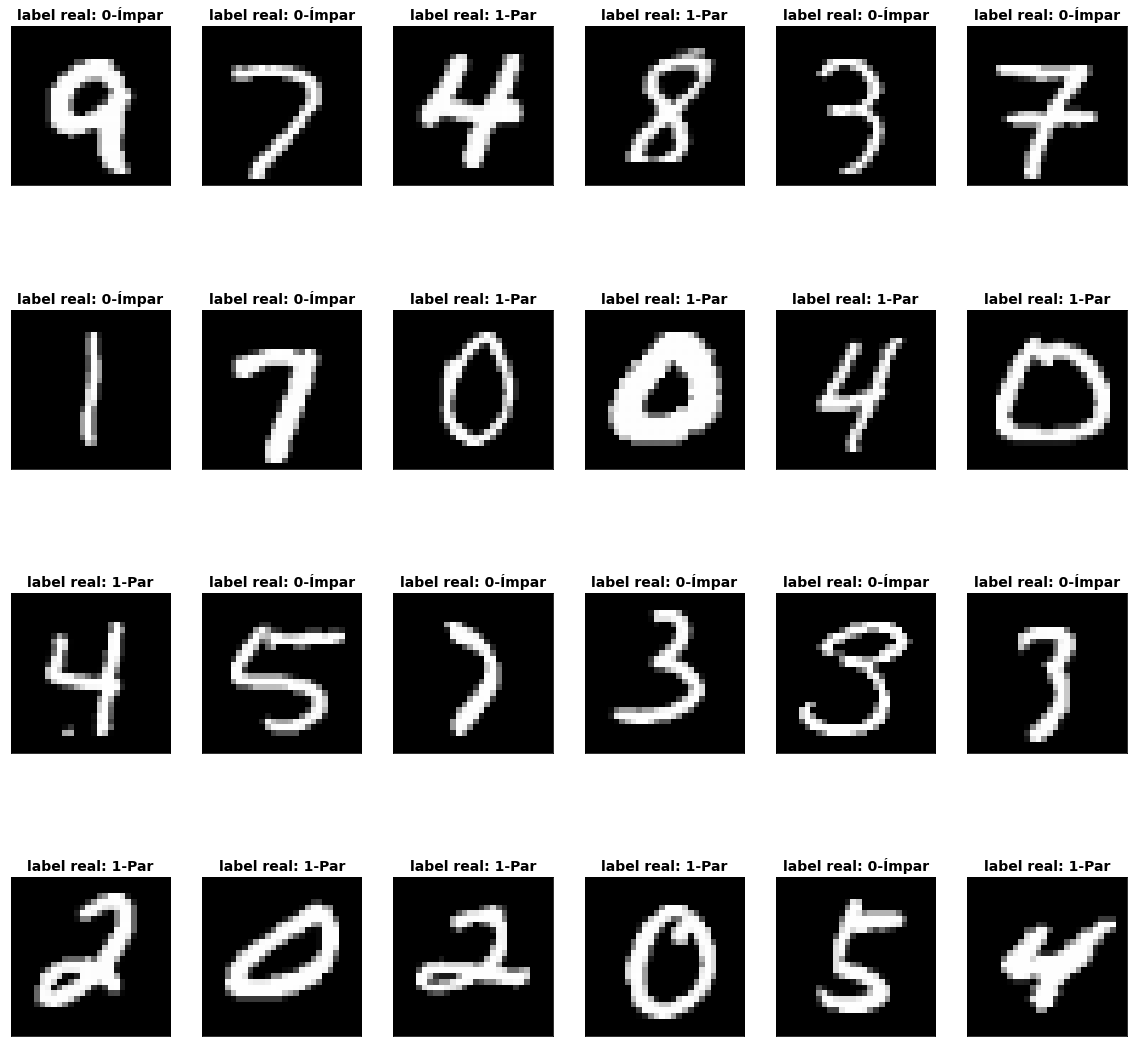

In [7]:
random_idx = np.random.randint(0,Xtrain.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtrain.iloc[idx_i,:].values.reshape(28,28)
    yval = ytrain[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([]) 
    plt.yticks([])
    if yval % 2 == 0:
        x='Ímpar'
    else:
        x='Par'
    plt.title("label real: " + str(yval)+ '-' + x, fontsize = 14, fontweight = 'bold')
plt.show()

### Dataset de validação

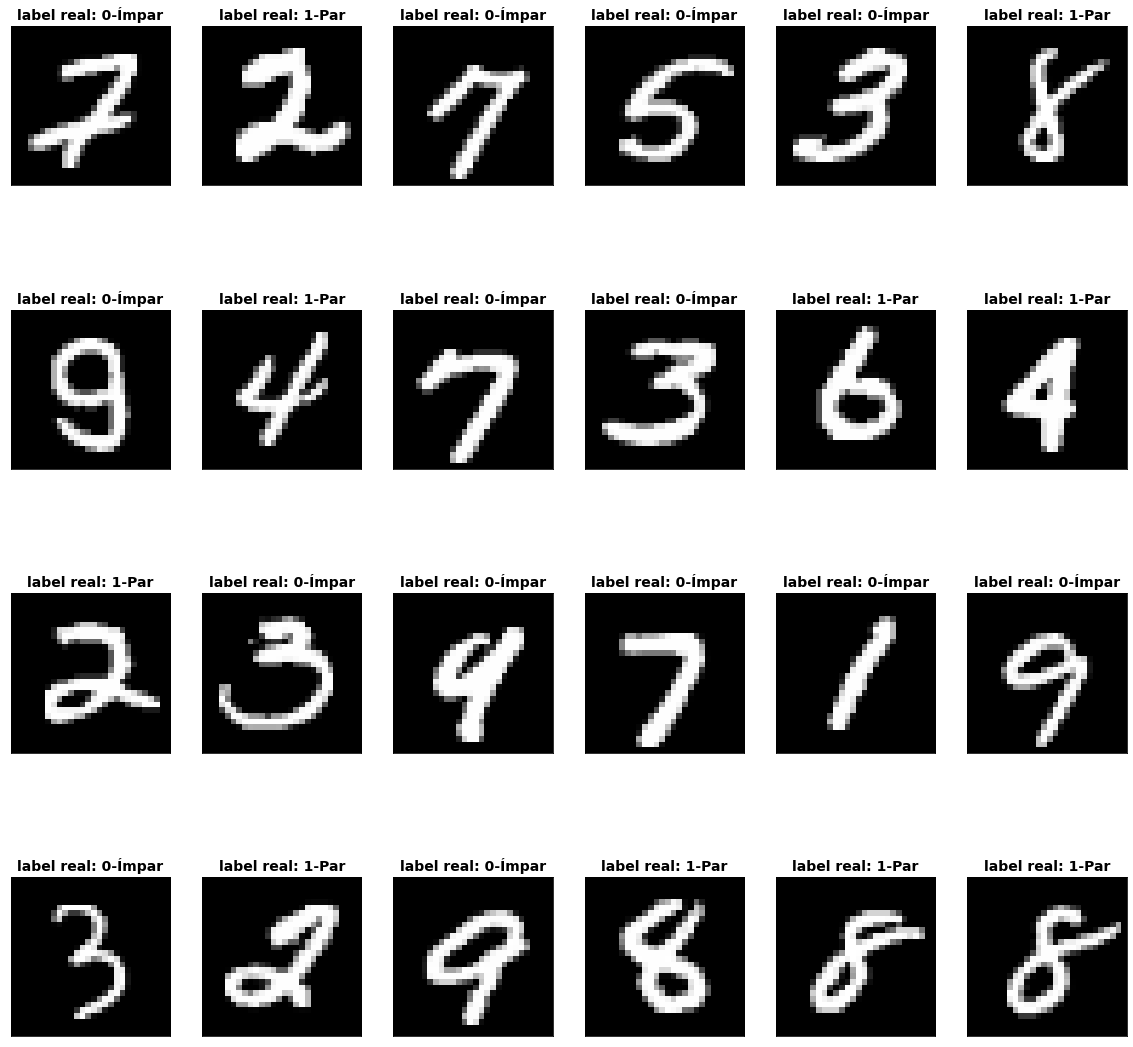

In [8]:
random_idx = np.random.randint(0,Xtest.shape[0], size = 24)

plt.figure(figsize=[20,20])
for i in range(len(random_idx)):
    idx_i = random_idx[i]
    xval = Xtest.iloc[idx_i,:].values.reshape(28,28)
    yval = ytest[idx_i]
    plt.subplot(4,6,i+1)
    plt.imshow(xval, cmap = plt.cm.Greys_r)
    plt.xticks([]) 
    plt.yticks([])
    if yval % 2 == 0:
        x='Ímpar'
    else:
        x='Par'
    plt.title("label real: " + str(yval)+ '-' + x, fontsize = 14, fontweight = 'bold')
plt.show()

### Checando o desbalanceamento das classes 0 e 1

In [9]:
print('Percentual de classe positiva (Pares): ',round((ytrain.sum() / ytrain.size) * 100,2), '%')
print('Percentual de classe negativa (Ímpares): ',round(((ytrain.size-ytrain.sum()) / ytrain.size) * 100,2), '%')

Percentual de classe positiva (Pares):  49.15 %
Percentual de classe negativa (Ímpares):  50.85 %


### Regressão logística

In [10]:
import time
from sklearn.linear_model import LogisticRegression

In [11]:
t0 = time.time()

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

tempo (em segundos) para execução:  5.29


### Comparando os resultados do classificador com a variável target usando a Acurácia

In [12]:
from sklearn.metrics import accuracy_score

predicoes = logreg.predict(Xtrain)

accuracy = accuracy_score(y_true = ytrain, y_pred = predicoes)

print(predicoes) #lista com os valores preditos
print("Acurácia em dados de treino da regressão logística foi de:", round(accuracy*100,2))

[0 1 1 ... 1 1 1]
Acurácia em dados de treino da regressão logística foi de: 89.89


### A princípio, nosso classificador acertou praticamente 90% das vezes.

### Validação cruzada

In [13]:
from sklearn.model_selection import KFold

In [92]:
def accuracy(metrica, X,y,folds):
    
    kf = KFold(n_splits = folds)
    lista_acuracia_treino = []
    lista_acuracia_validacao = []
    metrica = metrica
    
    for train_index, val_index in kf.split(X, y):
        
        Xtrain_folds = X.iloc[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X.iloc[val_index]
        yval_fold = y[val_index]

        metrica.fit(Xtrain_folds, ytrain_folds) 

        pred_treino = metrica.predict(Xtrain_folds) 
        pred_validacao = metrica.predict(Xval_fold)

        lista_acuracia_treino.append(accuracy_score(y_pred = pred_treino, y_true = ytrain_folds))
        lista_acuracia_validacao.append(accuracy_score(y_pred = pred_validacao, y_true = yval_fold))
    
    
    print("acurácias em treino: \n", lista_acuracia_treino, " \n| média: ", np.mean(lista_acuracia_treino))
    print()
    print("acurácias em validação: \n", lista_acuracia_validacao, " \n| média: ", np.mean(lista_acuracia_validacao))

In [93]:
t0 = time.time()

accuracy(LogisticRegression(),Xtrain,ytrain,5)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

acurácias em treino: 
 [0.8980454545454546, 0.9018863636363637, 0.8996136363636363, 0.8979318181818182, 0.9005909090909091]  
| média:  0.8996136363636363

acurácias em validação: 
 [0.8978181818181818, 0.8867272727272727, 0.8928181818181818, 0.9012727272727272, 0.89]  
| média:  0.8937272727272727
tempo (em segundos) para execução:  20.36


### Matriz de confusão

In [14]:
from sklearn.metrics import confusion_matrix

In [32]:
logreg = LogisticRegression() 
logreg.fit(Xtrain, ytrain)

x=confusion_matrix(y_true = ytrain, y_pred = logreg.predict(Xtrain))
print(x)
print()
print(type(x))
print()
print('Verdadeiros negativos:',x[0,0])
print('Falsos positivos:',x[0,1])
print('Falsos negativos:',x[1,0])
print('Verdadeiros positivos:',x[1,1])

[[25110  2855]
 [ 2703 24332]]

<class 'numpy.ndarray'>

Verdadeiros negativos: 25110
Falsos positivos: 2855
Falsos negativos: 2703
Verdadeiros positivos: 24332


### Calculando Precision, Recall e F1_score para regressão logística

In [35]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [39]:
print("LogReg:")
print('Precison: ', precision_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))
print('Recall: ', recall_score(y_true = ytrain, y_pred = logreg.predict(Xtrain))) #y_true = variável target / y_pred=valores preditos
print('F1 Score', f1_score(y_true = ytrain, y_pred = logreg.predict(Xtrain)))

LogReg:
Precison:  0.8949865744657373
Recall:  0.9000184945441095
F1 Score 0.8974954815388587


In [37]:
def validacao_cruzada(classificador, 
                      X, 
                      y, 
                      metrica, 
                      num_folds, 
                      print_info = False, 
                      nome_metrica = None):
    
    lista_metrica_treino = []
    lista_metrica_validacao = []
    
    kf = KFold(n_splits = num_folds)
    for train_index, val_index in kf.split(X, y):
        
        Xtrain_folds = X.iloc[train_index]
        ytrain_folds = y[train_index]
        Xval_fold = X.iloc[val_index]
        yval_fold = y[val_index]
        
        classificador.fit(Xtrain_folds, ytrain_folds)
        
        pred_treino = classificador.predict(Xtrain_folds)
        pred_validacao = classificador.predict(Xval_fold)
        
        lista_metrica_treino.append(metrica(y_pred = pred_treino, y_true = ytrain_folds))
        lista_metrica_validacao.append(metrica(y_pred = pred_validacao, y_true = yval_fold))
        
    if print_info:
        print("Métrica: " + nome_metrica)
        print('média treino:', np.mean(lista_metrica_treino))
        print('média validação:', np.mean(lista_metrica_validacao))
        
    return lista_metrica_treino, lista_metrica_validacao

In [38]:
t0 = time.time()

for metrica, nome_metrica in zip([precision_score, recall_score, f1_score], ['Precision', 'Recall', 'F1']):
    l1, l2 = validacao_cruzada(
                 classificador = LogisticRegression(),
                 X = Xtrain, 
                 y = ytrain, 
                 metrica = metrica, 
                 num_folds = 5,
                 print_info = True,
                 nome_metrica = nome_metrica)
    print()
    
#l1 e l2 foram usados devido a função retornar duas listas    
t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

Métrica: Precision
média treino: 0.8950480672208154
média validação: 0.8887488054435002

Métrica: Recall
média treino: 0.9014762919114933
média validação: 0.8958763151848084

Métrica: F1
média treino: 0.8982501815347541
média validação: 0.8922920192985856

tempo (em segundos) para execução:  63.69


### Escolhendo o melhor limiar

### Dados de treino

In [86]:
def trade_off(metrica, X,y,limiar_inicial,limiar_final,qtde_limiares):
    
    limiares = np.linspace(limiar_inicial,limiar_final,qtde_limiares)
    precision_list = []
    recall_list = []
    metrica = metrica
    metrica.fit(X,y)
    prob_class_1 = metrica.predict_proba(X)[:,1]
    
    for t in limiares:
    
        pred_t = np.where(prob_class_1 > t, 1, 0)
    
        precision_t = precision_score(y_true = y, y_pred = pred_t)
        recall_t = recall_score(y_true = y, y_pred = pred_t)

        precision_list.append(precision_t)
        recall_list.append(recall_t)    
    
    plt.figure(figsize=[20,10])
    plt.plot(range(len(limiares)), precision_list, c = 'red', label = 'Precision', lw = 2)
    plt.plot(range(len(limiares)), recall_list, c = 'blue', label = 'Recall', lw = 2)
    plt.xticks(range(len(limiares)), limiares.round(2), fontweight = 'bold', fontsize = 14)
    plt.yticks(fontweight = 'bold', fontsize = 14)
    plt.legend(fontsize = 20, bbox_to_anchor = [1,1])
    plt.grid()
    plt.xlabel("Limiar", fontsize = 20, fontweight = 'bold')
    plt.ylabel("Métrica", fontsize = 20, fontweight = 'bold')
    plt.title("TRADE OFF ~ PRECISION vs RECALL (Dados de teste)", fontsize = 20, fontweight = 'bold')
    plt.show()

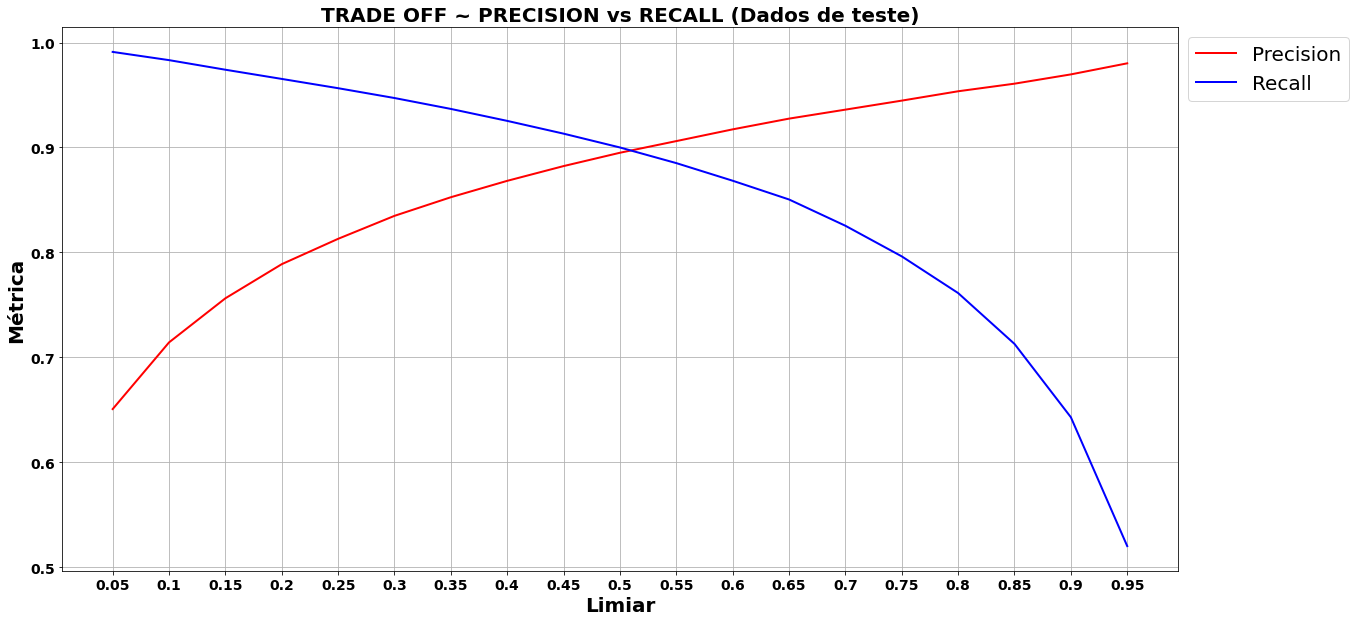

In [87]:
trade_off(LogisticRegression(),Xtrain,ytrain,0.05,0.95,19)

### Como pode-se ver no gráfico acima, o melhor limiar para os dados de teste parece realmente estar muito próximo de 0,5 que já é usado por default pelo algoritmo.

### Dados de validação

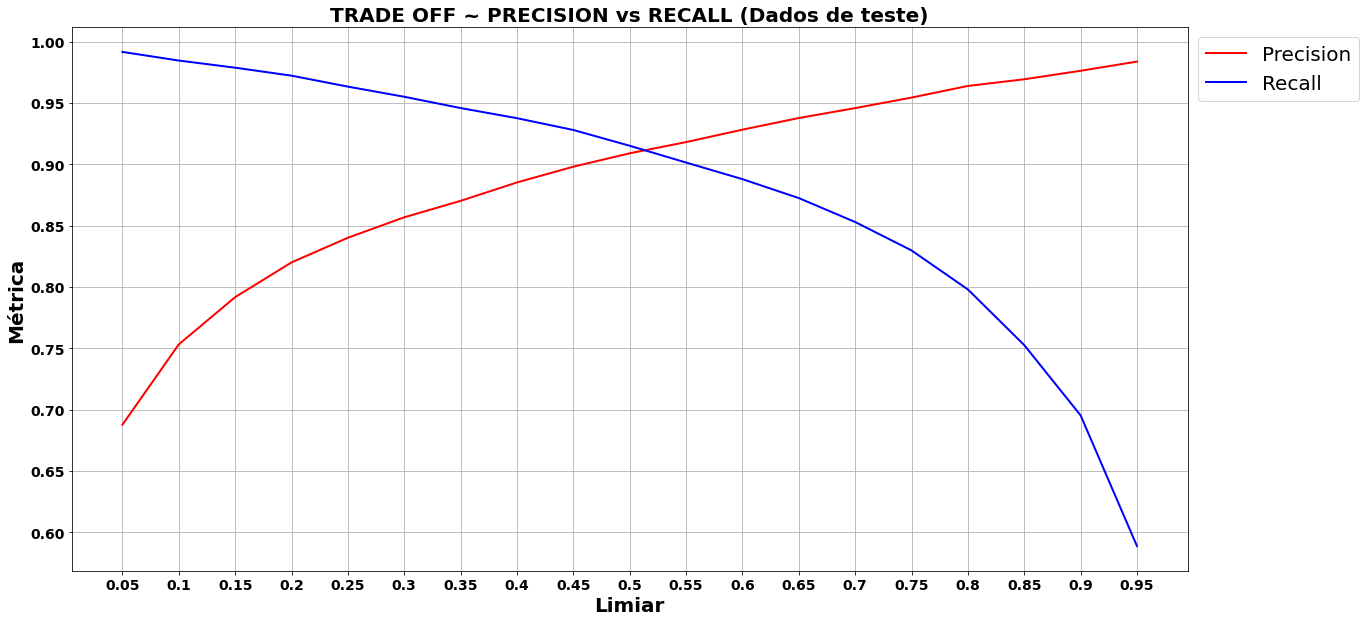

In [88]:
trade_off(LogisticRegression(),Xtest,ytest,0.05,0.95,19)

### Confirmado através dos dados de validação que 0,5 é realmente o melhor limiar

### AUC ROC 

In [79]:
from sklearn.metrics import roc_curve

In [94]:
def auc_roc(metrica,X,y):
    
    metrica = metrica
    metrica.fit(X,y)
    prob_class_1 = metrica.predict_proba(X)[:,1]

    fpr, tpr, thresholds = roc_curve(y_true = y, y_score = prob_class_1) 

    plt.figure(figsize=[8,6])
    plt.plot(fpr, tpr, c = 'blue', lw = 2)
    plt.title("Curva ROC (dataset de teste)", fontsize = 16, fontweight = 'bold')
    plt.xlabel("taxa de falso positivos", fontsize = 14, fontweight = 'bold')
    plt.ylabel("taxa de verdadeiro positivos", fontsize = 14, fontweight = 'bold')
    plt.grid()
    plt.show()

### Curva AUC para dados de treino

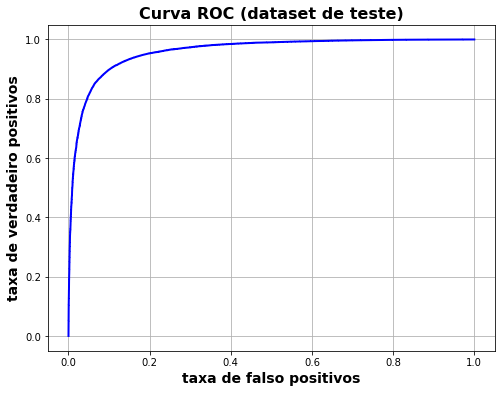

In [95]:
auc_roc(LogisticRegression(),Xtrain,ytrain)

### Curva AUC para dados de validação

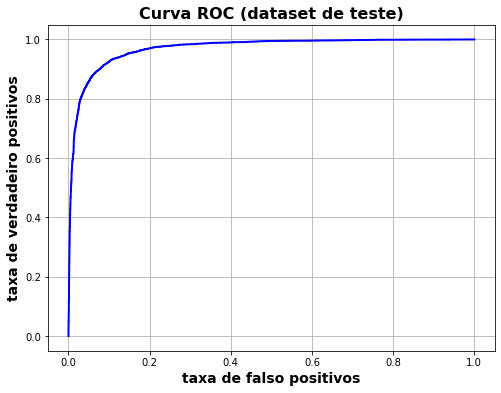

In [96]:
auc_roc(LogisticRegression(),Xtest,ytest)

### KNN-Classifier para predições

In [98]:
from sklearn.neighbors import KNeighborsClassifier

### Dados de treino

In [113]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(Xtrain, ytrain)

x=confusion_matrix(y_true = ytrain, y_pred = knn.predict(Xtrain))
print(x)
print()
print(type(x))
print()
print('Verdadeiros negativos:',x[0,0])
print('Falsos positivos:',x[0,1])
print('Falsos negativos:',x[1,0])
print('Verdadeiros positivos:',x[1,1])

[[27795   170]
 [  414 26621]]

<class 'numpy.ndarray'>

Verdadeiros negativos: 27795
Falsos positivos: 170
Falsos negativos: 414
Verdadeiros positivos: 26621


In [108]:
t0 = time.time()

print(knn.score(Xtrain, ytrain))

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

0.9893818181818181
tempo (em segundos) para execução:  130.97


In [112]:
t0 = time.time()

acuracia = accuracy(KNeighborsClassifier(),Xtrain,ytrain,5)
print(acuracia)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

acurácias em treino: 
 [0.988840909090909, 0.9890909090909091, 0.9882045454545455, 0.9882727272727273, 0.9883636363636363]  
| média:  0.9885545454545455

acurácias em validação: 
 [0.9816363636363636, 0.9831818181818182, 0.9805454545454545, 0.9831818181818182, 0.9791818181818182]  
| média:  0.9815454545454545
None
tempo (em segundos) para execução:  535.1


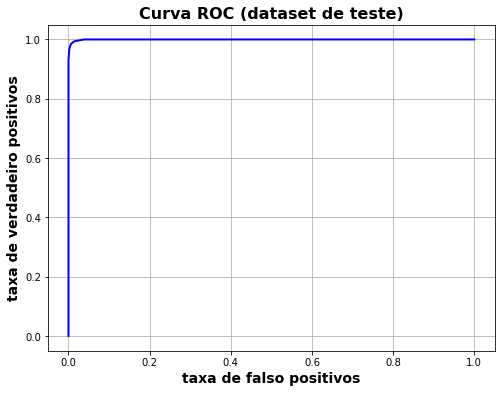

In [111]:
auc = auc_roc(KNeighborsClassifier(),Xtrain,ytrain)

### Dados de validação

In [114]:
x=confusion_matrix(y_true = ytest, y_pred = knn.predict(Xtest))
print(x)
print()
print(type(x))
print()
print('Verdadeiros negativos:',x[0,0])
print('Falsos positivos:',x[0,1])
print('Falsos negativos:',x[1,0])
print('Verdadeiros positivos:',x[1,1])

[[7549   68]
 [ 159 7224]]

<class 'numpy.ndarray'>

Verdadeiros negativos: 7549
Falsos positivos: 68
Falsos negativos: 159
Verdadeiros positivos: 7224


In [115]:
t0 = time.time()

print(knn.score(Xtest, ytest))

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

0.9848666666666667
tempo (em segundos) para execução:  35.23


In [116]:
t0 = time.time()

acuracia = accuracy(KNeighborsClassifier(),Xtest,ytest,5)
print(acuracia)

t1 = time.time()
print("tempo (em segundos) para execução: ", np.round(t1-t0,2))

acurácias em treino: 
 [0.9866666666666667, 0.9859166666666667, 0.9871666666666666, 0.98525, 0.98525]  
| média:  0.98605

acurácias em validação: 
 [0.975, 0.9803333333333333, 0.9673333333333334, 0.9793333333333333, 0.9873333333333333]  
| média:  0.9778666666666667
None
tempo (em segundos) para execução:  41.54


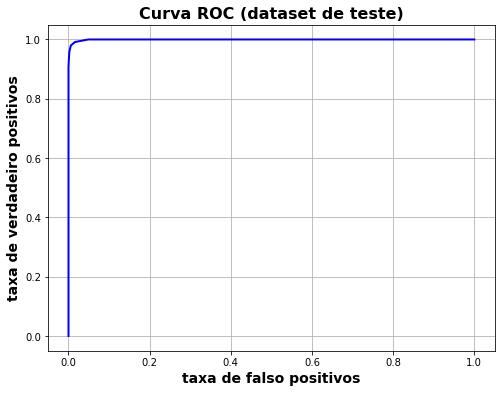

In [117]:
auc = auc_roc(KNeighborsClassifier(),Xtest,ytest)

### O KNN Classifier obteve uma performance excelente em suas predições com assertividade acima de 97% nos dados de treino e classificação, superando a regressão logística.